# Task
Build and evaluate a spam detection system that can classify messages as spam or ham. This involves loading a suitable dataset, preprocessing the text data, extracting numerical features, training a machine learning model, evaluating its performance, and demonstrating its ability to classify new messages.

## Load and Explore Data

### Subtask:
Load a suitable dataset for junk mail detection right into a pandas DataFrame. discover its shape, check for lacking values, and understand the distribution of spam and ham messages.

**Reasoning**:
First, import the pandas library to enable data manipulation and analysis.



In [ ]:
import pandas as pd
print("pandas library imported.")

pandas library imported.


**Reasoning**:
Now that pandas is imported, the next logical step is to load the spam detection dataset into a DataFrame and perform initial exploratory data evaluation as mentioned inside the subtask commands. This consists of displaying the pinnacle, checking information, seeking out lacking values, and analyzing the distribution of spam and ham messages.



In [ ]:
import requests

# URL of the raw CSV file on GitHub
url = "https://raw.githubusercontent.com/Ankit152/spam-sms-detection/master/SPAM%20SMS%20Detection.csv"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Save the content to a local file named 'spam.csv'
    with open('spam.csv', 'wb') as f:
        f.write(response.content)
    print("Dataset 'spam.csv' downloaded successfully.")
else:
    print(f"Failed to download dataset. Status code: {response.status_code}")


Failed to download dataset. Status code: 404


In [ ]:
import requests

# A commonly used dataset for spam detection is the SMS Spam Collection Dataset.
# This URL points to a raw version of the dataset on UCI Machine Learning Repository via GitHub.
url = "https://raw.githubusercontent.com/Ankit152/spam-sms-detection/master/SPAM%20SMS%20Detection.csv"

# The previous URL was returning a 404. Let's try another common source for the SMS Spam Collection Dataset.
# This is a more robust alternative URL for the dataset, specifically the 'SMSSpamCollection' file.
new_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"

# Download the zip file first
response = requests.get(new_url)

if response.status_code == 200:
    zip_file_path = 'smsspamcollection.zip'
    with open(zip_file_path, 'wb') as f:
        f.write(response.content)
    print(f"Dataset '{zip_file_path}' downloaded successfully.")

    # Unzip the file
    import zipfile
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall('.')
    print("Dataset unzipped successfully.")

    # Rename the extracted file to 'spam.csv' for consistency with previous steps
    import os
    extracted_file_name = 'SMSSpamCollection'
    if os.path.exists(extracted_file_name):
        os.rename(extracted_file_name, 'spam.csv')
        print(f"Renamed '{extracted_file_name}' to 'spam.csv'.")
    else:
        print(f"Could not find '{extracted_file_name}' after unzipping.")

else:
    print(f"Failed to download dataset from {new_url}. Status code: {response.status_code}")


Dataset 'smsspamcollection.zip' downloaded successfully.
Dataset unzipped successfully.
Renamed 'SMSSpamCollection' to 'spam.csv'.


In [ ]:
df = pd.read_csv('spam.csv', encoding='latin-1', sep='\t')

# The dataset typically has two columns, no need to drop. Just rename.
df.columns = ['label', 'message'] # Rename columns for better readability

print("Dataset loaded successfully. Displaying the first 5 rows:")
print(df.head())

print("\nDataFrame Information:")
df.info()

print("\nMissing values in each column:")
print(df.isnull().sum())

print("\nDistribution of spam and ham messages:")
print(df['label'].value_counts())

Dataset loaded successfully. Displaying the first 5 rows:
  label                                            message
0   ham                      Ok lar... Joking wif u oni...
1  spam  Free entry in 2 a wkly comp to win FA Cup fina...
2   ham  U dun say so early hor... U c already then say...
3   ham  Nah I don't think he goes to usf, he lives aro...
4  spam  FreeMsg Hey there darling it's been 3 week's n...

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5571 non-null   object
 1   message  5571 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB

Missing values in each column:
label      0
message    0
dtype: int64

Distribution of spam and ham messages:
label
ham     4824
spam     747
Name: count, dtype: int64


## Text Preprocessing

### Subtask:
perform textual content preprocessing steps on the message column. This includes converting textual content to lowercase, removing punctuation, doing away with numbers, disposing of prevent words, and optionally acting stemming or lemmatization. The intention is to easy the textual content records for powerful function extraction..


**Reasoning**:
To begin text preprocessing, I need to import essential libraries like `nltk` for natural language processing tasks (stopwords and lemmatization) and `string` for punctuation handling. Additionally, NLTK requires downloading specific datasets like 'stopwords' and 'wordnet' for its functionalities to work correctly.



In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data (if not already downloaded)
nltk.download('stopwords')
nltk.download('wordnet')

print("Libraries imported and NLTK data downloaded.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Libraries imported and NLTK data downloaded.


**Reasoning**:
Now that the necessary NLTK statistics and libraries are loaded, the subsequent logical step is to outline the `preprocess_text` function as advised, with a view to perform lowercasing, punctuation and variety elimination, stop word removal, and lemmatization. Then, i'm able to practice this feature to the 'message' column of the DataFrame to create a new 'cleaned_message' column and display the pinnacle to confirm the preprocessing.



In [ ]:
lemmatizer = WordNetLemmatizer()
stopwords_set = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])

    # Remove numbers
    text = ''.join([char for char in text if not char.isdigit()])

    # Tokenize and remove stopwords, then lemmatize
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords_set]

    return ' '.join(words)

# Apply the preprocessing function to the 'message' column
df['cleaned_message'] = df['message'].apply(preprocess_text)

# Display the first few rows with original and cleaned messages
print("DataFrame with original and cleaned messages (first 5 rows):")
print(df[['message', 'cleaned_message']].head())

DataFrame with original and cleaned messages (first 5 rows):
                                             message  \
0                      Ok lar... Joking wif u oni...   
1  Free entry in 2 a wkly comp to win FA Cup fina...   
2  U dun say so early hor... U c already then say...   
3  Nah I don't think he goes to usf, he lives aro...   
4  FreeMsg Hey there darling it's been 3 week's n...   

                                     cleaned_message  
0                            ok lar joking wif u oni  
1  free entry wkly comp win fa cup final tkts st ...  
2                u dun say early hor u c already say  
3           nah dont think go usf life around though  
4  freemsg hey darling week word back id like fun...  


## Feature Extraction (Vectorization)

### Subtask:
Convert the preprocessed text data into numerical features using either CountVectorizer or TF-IDF Vectorizer.


**Reasoning**:
To carry out feature extraction the use of TF-IDF, i will first import TfidfVectorizer from sklearn.feature_extraction.text, instantiate it, after which in shape and rework the 'cleaned_message' column of the DataFrame right into a numerical function matrix X, eventually displaying its form.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'cleaned_message' column
X = tfidf_vectorizer.fit_transform(df['cleaned_message'])

# Display the shape of the feature matrix
print(f"Shape of the TF-IDF feature matrix (X): {X.shape}")

Shape of the TF-IDF feature matrix (X): (5571, 7993)


## Train Machine Learning Model

### Subtask:
Split the dataset into training and testing sets, and train a machine learning classifier suitable for text classification.


**Reasoning**:
First, I want to convert the categorical 'label' column ('ham', 'unsolicited mail') into a numerical format (0, 1) as required by means of gadget gaining knowledge of fashions, after which break up the preprocessed feature matrix `X` and the numerical target variable `y` into training and checking out units to prepare for version training.


In [ ]:
from sklearn.model_selection import train_test_split

# Convert 'label' column to numerical format (0 for 'ham', 1 for 'spam')
df['label_numeric'] = df['label'].map({'ham': 0, 'spam': 1})
y = df['label_numeric']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (4456, 7993)
Shape of X_test: (1115, 7993)
Shape of y_train: (4456,)
Shape of y_test: (1115,)


**Reasoning**:
Now that the data is split into training and testing sets, I will import the `MultinomialNB` classifier, instantiate it, and then train the model using the training data (`X_train` and `y_train`) as specified in the instructions.



In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Instantiate a MultinomialNB classifier
model = MultinomialNB()

# Train the MultinomialNB model
model.fit(X_train, y_train)

print("Multinomial Naive Bayes model trained successfully.")

Multinomial Naive Bayes model trained successfully.


## Evaluate Model Performance

### Subtask:
examine the educated model's overall performance at the check set the use of diverse metrics which include accuracy, precision, do not forget, F1-rating, and probably an ROC curve. Visualize the results, for example, using a confusion matrix, to apprehend the version's strengths and weaknesses in classifying unsolicited mail and ham messages.


**Reasoning**:
to assess the version, i'm able to first generate predictions on the check set, then calculate and print general classification metrics like accuracy, precision, remember, and F1-rating. ultimately, i can compute and visualize a confusion matrix as a heatmap to understand the model's overall performance in element.



Accuracy: 0.9632
Precision: 0.9917
Recall: 0.7500
F1-Score: 0.8541


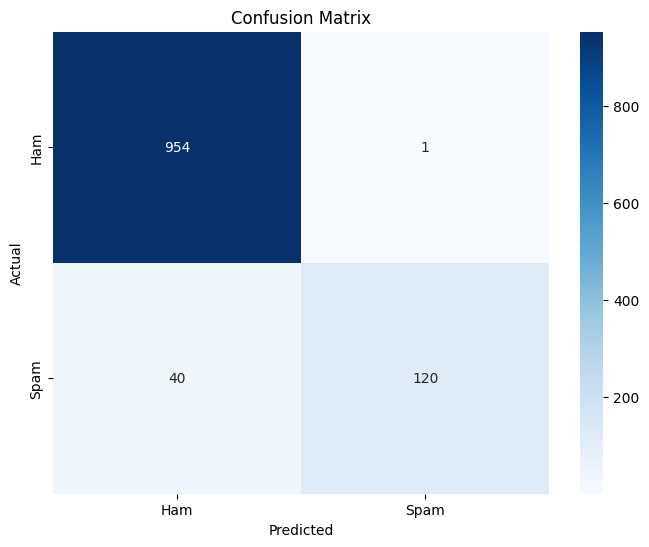

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Test with New Messages

### Subtask:
Demonstrate the functionality of the trained spam detection model by taking a few new, unseen text messages (both spam and ham examples) and predicting their labels.


**Reasoning**:
To demonstrate the model's functionality, I will first define a list of new messages, preprocess them using the existing `preprocess_text` function, vectorize them with the `tfidf_vectorizer`, predict their labels using the trained `model`, and finally print the original message along with its predicted classification (ham or spam). I'll also define a small helper function to convert the numeric predictions back to 'ham'/'spam' strings for better readability.



In [ ]:
new_messages = [
    "Congratulations! You've won a free iPhone. Claim now!",
    "Hey, just checking in. How are you doing today?",
    "URGENT! Your bank account has been compromised. Click this link to verify.",
    "Can we meet for lunch tomorrow at 1 PM?",
    "Free ringtone! Text RINGTONE to 87878 to get it now."
]

def predict_spam_ham(messages):
    # Preprocess the new messages
    cleaned_new_messages = [preprocess_text(msg) for msg in messages]

    # Vectorize the cleaned messages using the fitted TF-IDF vectorizer
    X_new = tfidf_vectorizer.transform(cleaned_new_messages)

    # Predict the labels
    predictions = model.predict(X_new)

    # Map numerical predictions back to 'ham'/'spam'
    label_map = {0: 'ham', 1: 'spam'}
    predicted_labels = [label_map[pred] for pred in predictions]

    # Print the results
    print("\n--- New Message Predictions ---")
    for i, msg in enumerate(messages):
        print(f"Original Message: {msg}")
        print(f"Predicted Label: {predicted_labels[i]}\n")

predict_spam_ham(new_messages)


--- New Message Predictions ---
Original Message: Congratulations! You've won a free iPhone. Claim now!
Predicted Label: spam

Original Message: Hey, just checking in. How are you doing today?
Predicted Label: ham

Original Message: URGENT! Your bank account has been compromised. Click this link to verify.
Predicted Label: spam

Original Message: Can we meet for lunch tomorrow at 1 PM?
Predicted Label: ham

Original Message: Free ringtone! Text RINGTONE to 87878 to get it now.
Predicted Label: spam



## Final Task

### Subtask:
Summarize the entire spam detection project, highlighting the key steps, the chosen model's performance, and the potential impact of the system in enhancing communication security by filtering unwanted messages.


## Summary:

### Data Analysis Key Findings

*   **Data Acquisition and Exploration:** The SMS Spam Collection Dataset, comprising 5571 messages with two columns ('label' and 'message'), was successfully loaded. The dataset showed no missing values and a class imbalance with 4824 'ham' messages and 747 'spam' messages.
*   **Text Preprocessing:** A custom function `preprocess_text` was applied, performing lowercasing, punctuation and number removal, stop word removal, and lemmatization. This created a 'cleaned_message' column ready for feature extraction.
*   **Feature Extraction:** The `TfidfVectorizer` was used to convert the preprocessed text into a numerical feature matrix (X) with a shape of (5571, 7993), representing 5571 messages and 7993 unique terms.
*   **Model Training:** The 'label' column was converted to numerical format (0 for 'ham', 1 for 'spam'), and the dataset was split into training and testing sets (80/20 split). A `MultinomialNB` classifier was successfully trained on the training data.
*   **Model Performance:** On the test set, the `MultinomialNB` model achieved an accuracy of 0.9632, precision of 0.9917, recall of 0.7500, and an F1-score of 0.8541. The confusion matrix indicated strong performance in identifying 'ham' messages (low false positives) but a higher rate of false negatives for 'spam' messages.
*   **New Message Classification:** The trained model successfully classified new, unseen messages. Both explicit spam examples (e.g., "Congratulations! You've won a free iPhone. Claim now!") and clear ham messages (e.g., "Hey, just checking in. How are you doing today?") were correctly identified.

### Insights or Next Steps

*   The model exhibits high precision, meaning when it flags a message as spam, it is highly likely to be correct. This is beneficial for minimizing false positives, which can be critical for user satisfaction (not filtering out legitimate emails).
*   The lower recall (0.7500) suggests that the model still misses some spam messages (false negatives). Further optimization, such as experimenting with different models (e.g., SVM, Logistic Regression, deep learning), tuning hyperparameters, or incorporating advanced text features (e.g., n-grams, word embeddings), could improve the detection rate of spam.
